# Hydrostats Features
Hydrostats is a module for time series comparison. It has preproccessing tools, visualization tools, a library of over 50 error metrics for quantitative analysis of data from two timeseries, and analysis tools. In this notebook examples are given for most of the hydrostats features. The two code blocks below shows how to install hydrostats with PIP and show the current version (make sure it is the most recent version). It also imports the necessary modules for this demonstration.

In [1]:
# Run these commands if you have not yet installed hydrostats, and make sure it is the latest
# version

# !pip install hydrostats --upgrade
!pip show hydrostats

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import hydrostats as hs
import hydrostats.data as hd
import hydrostats.visual as hv

pd.options.display.max_rows = 10

## Preprocessing
Hydrostats has tools that simply the preprocessing of data so that an analysis can be run on two timeseries. Once the data has been preprocessed then the analysis can be run on the two time-series.

### Merge Data Function
The first thing we need to do is load our data into the notebook, which is done below. In this example we will be comparing forecasts from the Streamflow Prediction Tool (SFPT) Tethys app to forecasts from the Global Flood Awareness System (GLOFAS). The data is loaded from the Hydrostats github repository, but if a user wanted to load local files, they would need to supply the path to the files instead. In this example the data is daily for both datasets. The merge_data Hydrostats function function used below allows a user to take two timeseries and merge them into a combined pandas dataframe.

In [ ]:
# Defining the URLs of the datasets
github_base_url = r"https://raw.github.com/BYU-Hydroinformatics/Hydrostats/master/Sample_data"
sfpt_url = github_base_url + r"/sfpt_data/magdalena-calamar_interim_data.csv"
glofas_url = github_base_url + r"/GLOFAS_Data/magdalena-calamar_ECMWF_data.csv"

merged_df = hd.merge_data(sfpt_url, glofas_url, column_names=("SFPT", "GLOFAS"))
merged_df

,SFPT,GLOFAS
1980-01-01,0.0000,0.000000
1980-01-02,15.8061,6874.124512
1980-01-03,67.3009,6619.040039
1980-01-04,145.9610,6375.136719
1980-01-05,284.9060,6145.805664
...,...,...
2014-12-28,9431.7600,9824.146484
2014-12-29,9317.5400,9405.354492
2014-12-30,9420.1200,8934.901367
2014-12-31,9559.3100,8472.720703


### Seasonal Periods
Once we have the entire dataset merged into one combined dataframe, can find then go on to find certain seasonal periods that we want to analyze with the seasonal_period hydrostats function. In the example below, we only want to analyze from April 1st to July 31st seasonally within the time range of Jan. 1st, 1986 to Dec. 31st, 1992.

In [ ]:
seasonal_df = hd.seasonal_period(
    merged_df, ("04-01", "07-31"), time_range=("1986-01-01", "1992-12-31")
)
seasonal_df

,SFPT,GLOFAS
1986-04-01,5577.78,5213.395020
1986-04-02,5332.39,5096.874512
1986-04-03,5115.94,5002.630859
1986-04-04,4940.99,4922.985352
1986-04-05,4830.99,4852.116699
...,...,...
1992-07-27,5914.67,6413.156250
1992-07-28,5766.83,6228.680664
1992-07-29,5785.00,6062.862793
1992-07-30,5765.54,5918.024902


### Daily and Monthly Averages
We can also easily find the daily and monthly averages in streamflows over the 35 years of daily data we have. In the example below we use the daily_average function, but a monthly_average function() in the same module is also available. We create a new dataframe that contains the daily averages for this time-series below.

In [5]:
daily_avg_df = hd.daily_average(df=merged_df)
daily_avg_df

,SFPT,GLOFAS
01/01,7331.305278,7676.792460
01/02,7108.640746,7753.671798
01/03,6927.147740,7631.900453
01/04,6738.162886,7483.029897
01/05,6552.914171,7316.004227
...,...,...
12/27,7994.357429,8807.690639
12/28,7872.819143,8642.877365
12/29,7791.741143,8435.175677
12/30,7729.451143,8225.315074


### Daily and Monthly Standard Deviation and Standard Error
Hydrostats also can calculate daily and monthly standard deviation as well as daily and monthly standard error. We create a new dataframe below that contains the daily standard error for this time-series below.

In [6]:
daily_std_error = hd.daily_std_error(merged_data=merged_df)
daily_std_error

,SFPT,GLOFAS
01/01,558.189895,494.958042
01/02,553.290181,442.497656
01/03,535.002487,432.096928
01/04,514.511095,422.915060
01/05,489.287216,411.861086
...,...,...
12/27,582.957832,557.932109
12/28,581.465297,540.021918
12/29,573.949000,517.494155
12/30,560.993945,495.040565


## Visualization
Once preprocessing on the data is finished, the user can then start to visualize the data with the Hydrostats visual module. There are 4 functions included in the Hydrostats visual model, which are: plot, hist, scatter, and qqplot. These functions are demonstrated below.

### The Plot Function
The plot function will simply take the observed and simulated data and compare them by plotting them on the vertical axis with respect to time. When comparing stream flow rates, this is known as a hydrograph, but the plot function can be used for any time series if desired by the user. An few examples of using the plot function is shown below. By using this function, we are able to plot the entire time series, the seasonal period that we specified, the daily averages, and the gaily averages with error bars.

**Note**: If you are viewing these examples in Google's Colaboratory, they will not display properly. You will need to use jupyter notebooks or jupyter lab to view them properly.

#### Plotting the Entire Time Series
The entire time series is plotted below with the hydrostats visual plot function. In this example, the linestyles are changed from the default, a title, legend, and labels are added, and metrics are calculated and displayed on the side.

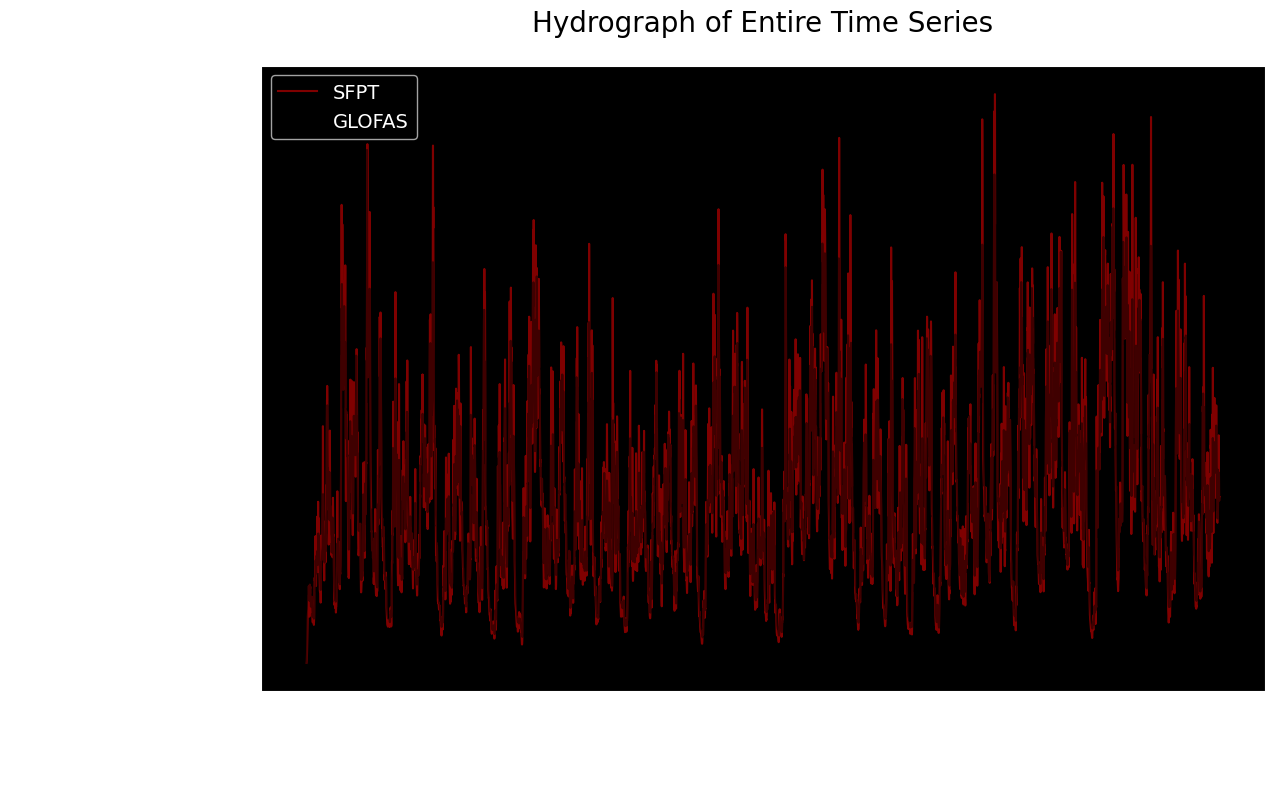

In [ ]:
hv.plot(
    merged_data_df=merged_df,
    title="Hydrograph of Entire Time Series",
    linestyles=("r-", "k-"),
    legend=("SFPT", "GLOFAS"),
    labels=["Datetime", "Streamflow (cfs)"],
    metrics=["ME", "NSE", "SA"],
    fig_size=(14, 8),
    text_adjust=(-0.25, 0.8),
)
plt.show()

#### Plotting Seasonal Averages with Error Bars
Below, it is demonstrated how to plot daily averages with error bars. You simply need to pass in the daily average dataframe that we created earlier in the pre-processing step (daily_avg_df()) and pass in the daily standard error dataframe in the ebars argument (daily_std_error()). We change the linestyle and the color of the ebars below and a title, legend, and labels are added.

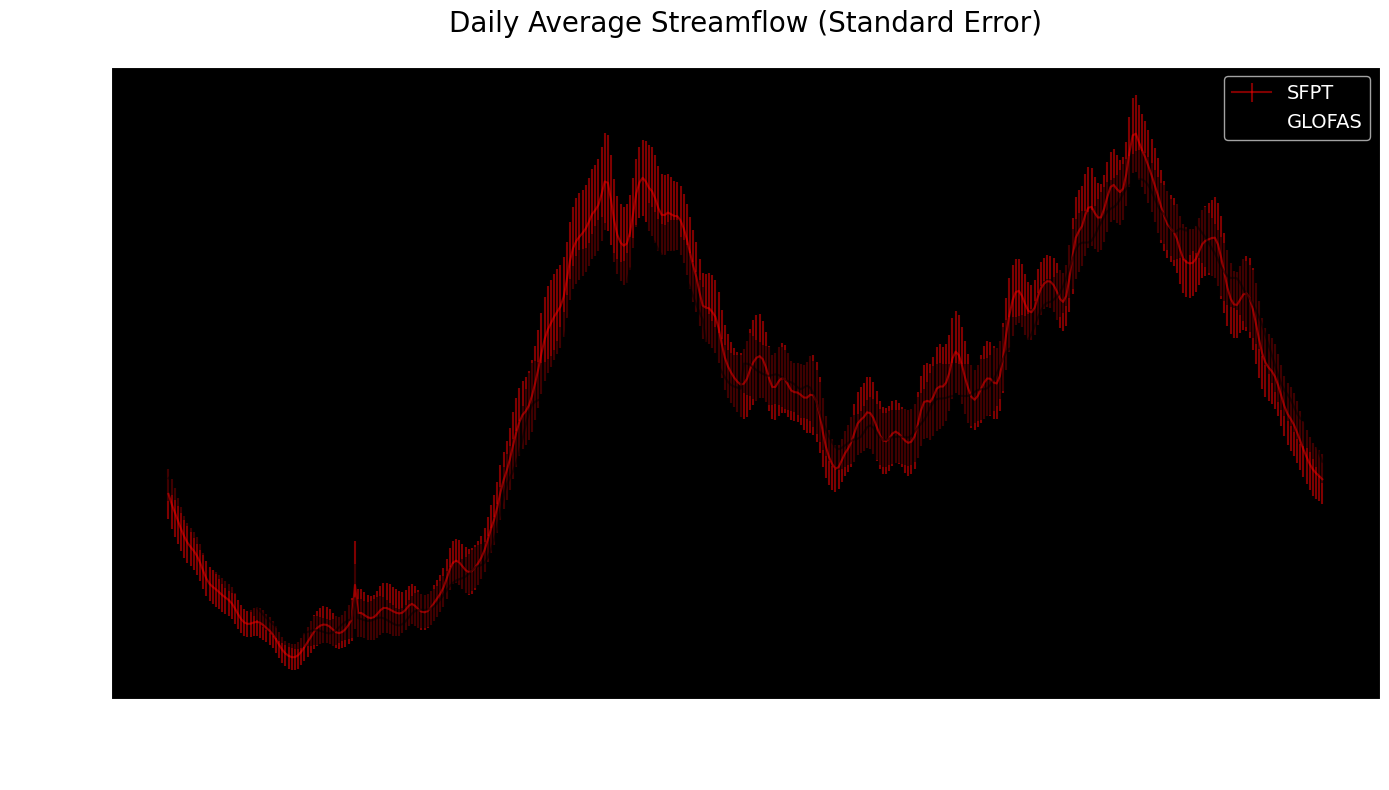

In [ ]:
hv.plot(
    merged_data_df=daily_avg_df,
    title="Daily Average Streamflow (Standard Error)",
    legend=("SFPT", "GLOFAS"),
    x_season=True,
    labels=["Datetime", "Streamflow (csm)"],
    linestyles=("r-", "k-"),
    fig_size=(14, 8),
    ebars=daily_std_error,
    ecolor=("r", "k"),
)
plt.show()

### Plotting a Histogram
To plot a histogram, we can either use the merged dataframe that we created or two arrays of simulated and observed data. In this case, we use the merged dataframe because we already have it saved to memory. We specify the number of bins and then add a legend, title, and labels. We can compare the distribution of the data with this tool.

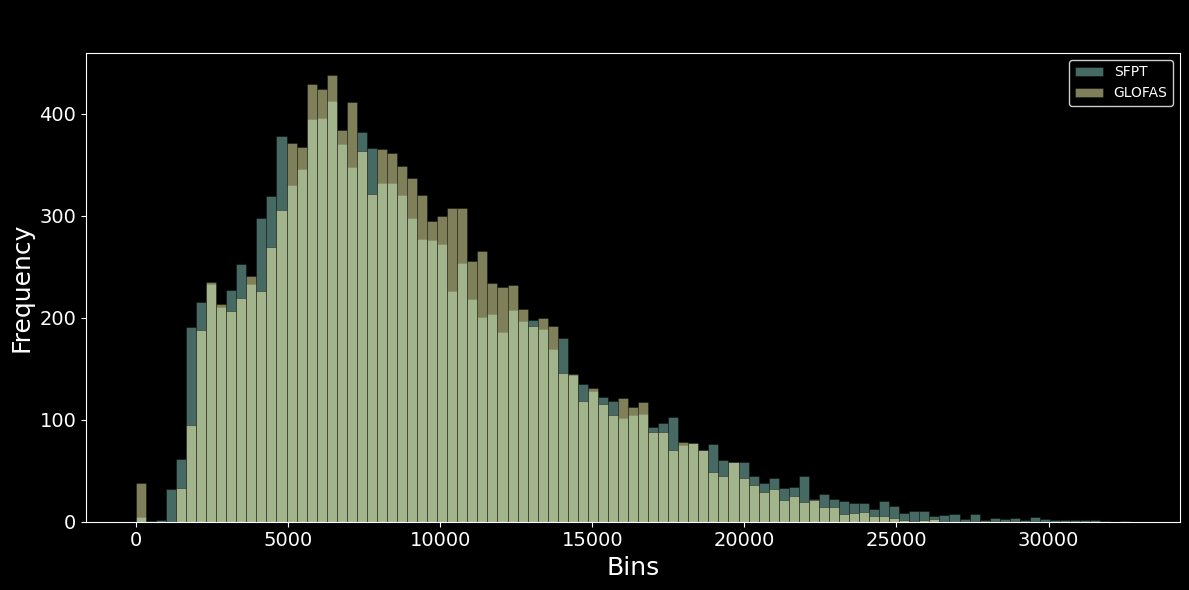

In [ ]:
hv.hist(
    merged_data_df=merged_df,
    num_bins=100,
    title="Histogram of Streamflows",
    legend=("SFPT", "GLOFAS"),
    labels=("Bins", "Frequency"),
)
plt.show()

### Plotting a Quantile-Quantile (qq) Plot
Similar to the histogram, the qq plot is a means to check whether two datasets come from the same distribution. In the example below, we use the merged dataframe (merged_df) to supply the data. We can also choose to use two array of both simulated and observed data if desired. We then create a title, legend, and labels. We also change the size of the figure (inches).

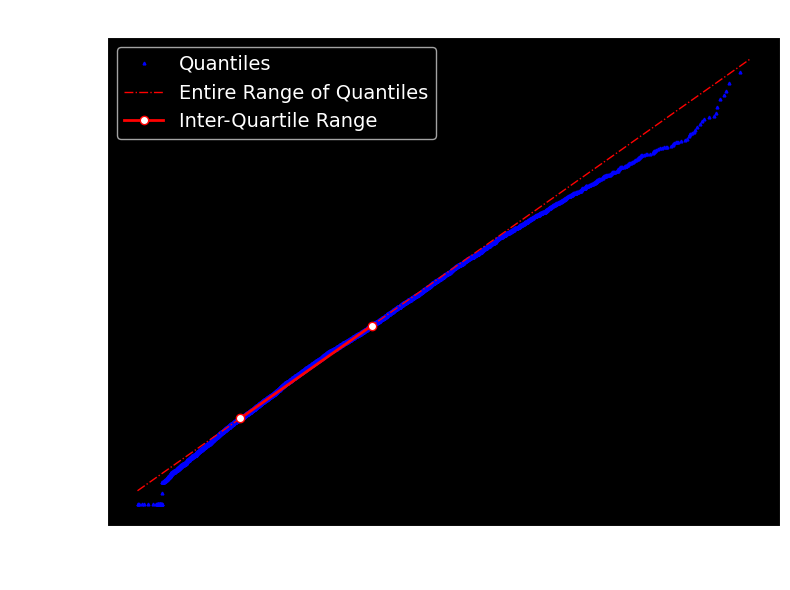

In [10]:
hv.qqplot(
    merged_data_df=merged_df,
    title="Quantile-Quantile Plot of Data",
    xlabel="SFPT Data Quantiles",
    ylabel="GLOFAS Data Quantiles",
    legend=True,
    figsize=(8, 6),
)
plt.show()

### Plotting a Scatter Plot
We can plot scatter plots using the scatter() function. In the example below we pass in the data in the form of arrays to demonstrate how to do this. We plot the data in a scatter plot with both a normal scale and a log-log scale. Typically, the Log-Log scale spreads out the data for a more clear representation. In this example, the data looks about the same with either scale. We add a title, labels, and a legend for the lines added.

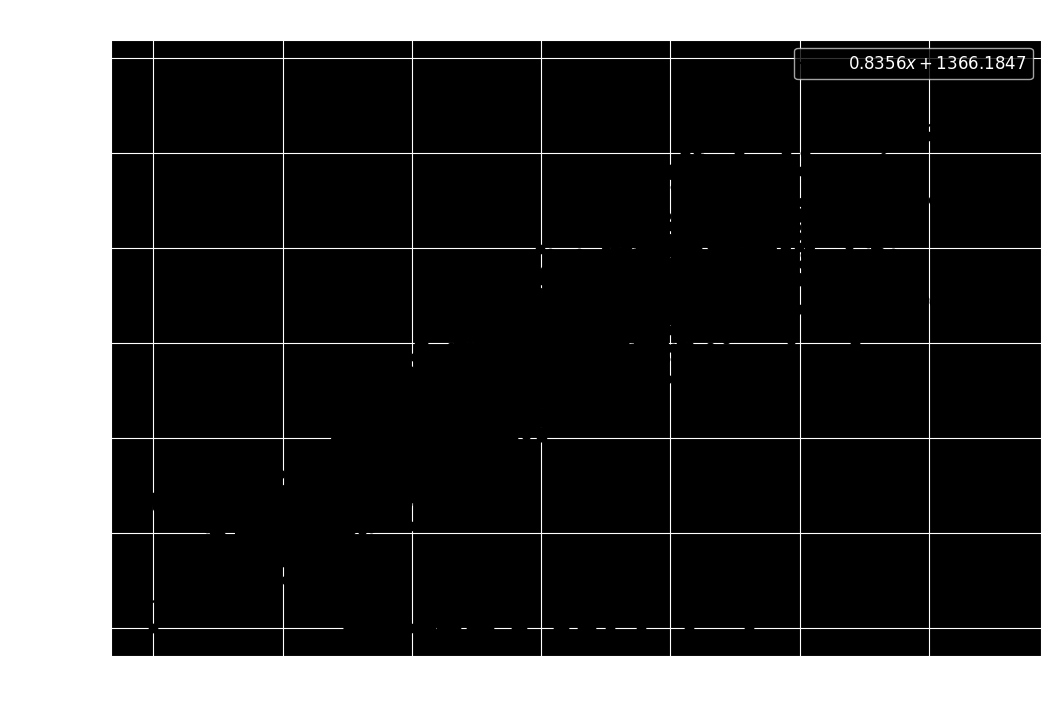

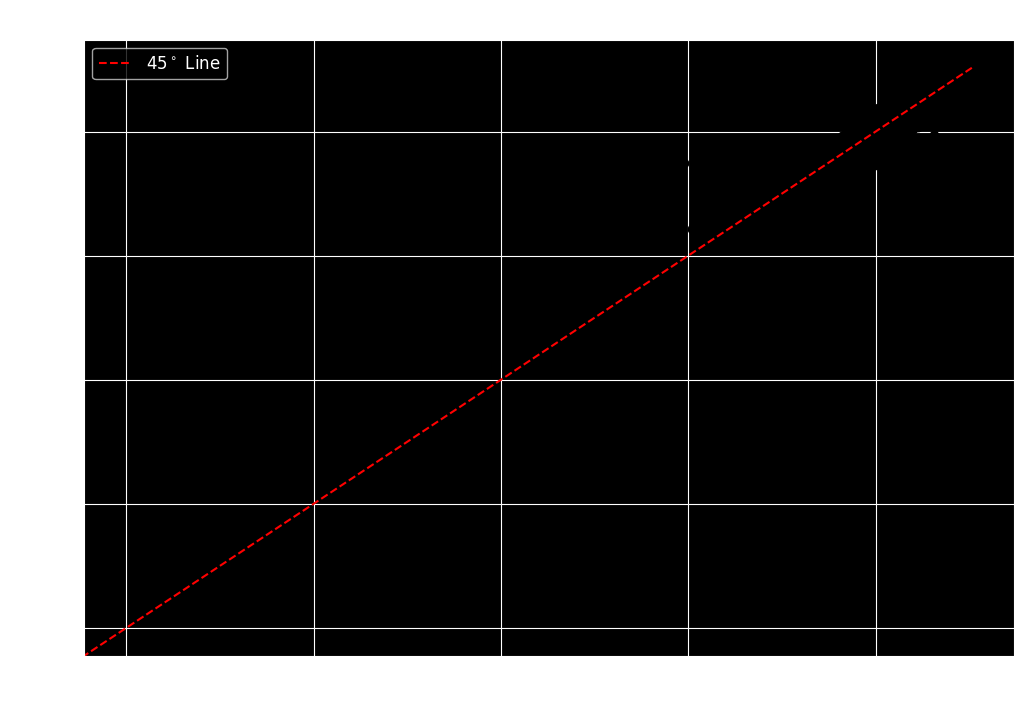

In [ ]:
SFPT_array = merged_df.iloc[:, 0].to_numpy()
GLOFAS_array = merged_df.iloc[:, 1].to_numpy()

hv.scatter(
    sim_array=SFPT_array,
    obs_array=GLOFAS_array,
    grid=True,
    title="Scatter Plot (Normal Scale)",
    labels=("SFPT", "GLOFAS"),
    best_fit=True,
)
plt.show()

hv.scatter(
    sim_array=SFPT_array,
    obs_array=GLOFAS_array,
    grid=True,
    title="Scatter Plot (Log-Log Scale)",
    labels=("SFPT", "GLOFAS"),
    line45=True,
    log_scale=True,
)
plt.show()

## Error Metric Calculations
AFter we have done the preprocessing and the visualization, we can do a more in depth analysis of the data by creating tables of metrics and doing a time lag analysis to check for any potential timing errors in the data.

### Calculating Error Metric with the HydroErr package

Hydrostats has a module that pulls from the HydroErr package that allows users to access over 60 different error metrics. These metrics have data checks to make sure that the data that you are inputing to the metrics does not have NaN or Inf values, and can optionally check for zero and negative values. Below we demonstrate how to calculate error metrics, and highlight how to remove zero values.

In [12]:
# Putting the data from the dataframe into 1D arrays
sfpt_array = merged_df.iloc[:, 0].to_numpy()
glofas_array = merged_df.iloc[:, 1].to_numpy()

# Calculating the KGE metric
hs.kge_2012(sfpt_array, glofas_array)

np.float64(0.8767535070958947)

In [13]:
# Note that when we remove zeros the indices where zeros are located are given through a warning
hs.kge_2012(sfpt_array, glofas_array, remove_zero=True)

C:\Users\wade.roberts\Code\Hydrostats\.venv\Lib\site-packages\HydroErr\HydroErr.py:3474: UserWarning: Row(s) [    0   877   878   879   880   881   892   893   894   895   896   897
   898   899   900   901   902   903   904   905   906   907   908   909
   910   911 11858 11859 11860 11861 11862 11863 11864 11865 11866 11867
 11868 11869] contained zero values and the row(s) have been removed (Rows are zero indexed).
  simulated_array, observed_array = treat_values(


np.float64(0.8728712053147045)

### Creating a Table of Error Metrics

To create a table of metrics, we use the make_table() function, located in the main hydrostats import. In this function we can specify the time periods we want to analyze (the entire time series will be analyzed by default) as well as the metrics that we want to use. Below we specify the merged dataframe, the metrics we want to use, the time periods to want to evaluate (high and low periods in this case), to remove zeros and negatives, and the location of the station to put in the table. This may raise a lot of errors if the two timeseries have values that need to be removed, so if you would like to ignore the errors, the warnings.simplefilter('ignore') can be applied.

To find what abbreviations correspond to which metric, a table is provided in the docs [here](https://waderoberts123.github.io/Hydrostats/ref_table.html).

In [ ]:
hs.make_table(
    merged_dataframe=merged_df,
    metrics=["MAE", "r2", "ACC", "NSE", "KGE (2012)", "SA"],
    seasonal_periods=[
        ("01-01", "03-31"),
        ("04-01", "06-30"),
        ("07-01", "09-30"),
        ("10-01", "12-31"),
    ],
    remove_neg=True,
    remove_zero=True,
    location="Magdalena",
)

C:\Users\wade.roberts\Code\Hydrostats\.venv\Lib\site-packages\HydroErr\HydroErr.py:256: UserWarning: Row(s) [    0   877   878   879   880   881   892   893   894   895   896   897
   898   899   900   901   902   903   904   905   906   907   908   909
   910   911 11858 11859 11860 11861 11862 11863 11864 11865 11866 11867
 11868 11869] contained zero values and the row(s) have been removed (Rows are zero indexed).
  simulated_array, observed_array = treat_values(
C:\Users\wade.roberts\Code\Hydrostats\.venv\Lib\site-packages\HydroErr\HydroErr.py:1824: UserWarning: Row(s) [    0   877   878   879   880   881   892   893   894   895   896   897
   898   899   900   901   902   903   904   905   906   907   908   909
   910   911 11858 11859 11860 11861 11862 11863 11864 11865 11866 11867
 11868 11869] contained zero values and the row(s) have been removed (Rows are zero indexed).
  simulated_array, observed_array = treat_values(
C:\Users\wade.roberts\Code\Hydrostats\.venv\Lib\site-pack

,Location,MAE,r2,ACC,NSE,KGE (2012),SA
Full Time Series,Magdalena,1157.669988,0.907503,0.952555,0.873684,0.872871,0.150922
January-01:March-31,Magdalena,631.984177,0.887249,0.941641,0.861163,0.858187,0.156337
April-01:June-30,Magdalena,1394.640050,0.882599,0.939169,0.813737,0.876890,0.152863
July-01:September-30,Magdalena,1188.542871,0.884249,0.940053,0.829492,0.831188,0.149193
October-01:December-31,Magdalena,1410.852917,0.863800,0.929120,0.793927,0.791257,0.141005


## Ensemble Adjusted Error Metrics and Skill Score

Hydrostats also includes many common forecast ensemble metrics such as the ensemble mean squared error (EMSE), the continuous ranked probability score (CRPS), the area under the receiver operating characteristic curve (AUROC), and the ensemble adjusted brier score (EABS). Users can also calculate skill scores for all of these metrics comparing their model’s forecast performance to that of a benchmark forecast.

Below we give an example of calculating the crps scores for an ensemble forecast and a benchmark and then computing the skill score to compare the two forecasts.

In [15]:
import hydrostats.ens_metrics as em

# Generate random data as an example
rng = np.random.default_rng(6543934)
ens_array = (rng.random((15, 52)) + 1) * 100  # Matrix 15 x 52, range [0, 100)
obs_array = (rng.random(15) + 1) * 100  # 1D matrix of length 15, range [0, 100)

# Compute crps metric values
crps_forecast = em.ens_crps(obs_array, ens_array)["crps"]  # Only store the scores in our variable

# Compute example benchmark forecast scores
crps_benchmark = em.ens_crps(obs_array, ens_array[:, 1:3])[
    "crps"
]  # Only use the first two ensembles as a benchmark

# Compute the skill score
skill_score = em.skill_score(scores=crps_forecast, bench_scores=crps_benchmark, perf_score=0)

# In this case, using the 52 ensembles is slightly more skillful than using just the first two.
# This is random though so this does not mean much.
skill_score

{'skillScore': np.float64(0.3643322871871232),
 'standardDeviation': np.float64(0.08171091499397933)}